# EDA for platform of temporary leases


## Importing packages and data


In [1]:
# type hinting
from typing import Callable, Any

import pickle
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, TargetEncoder

In [2]:
df = pd.read_csv('../dataset/teste_indicium_precificacao.csv')
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Defining functions


In [3]:
def plot_visualization(
    plot_type: Callable,
    title: str,
    xlabel: str,
    ylabel: str,
    legend: str = None,
    lim: Callable = None,
    figsize: tuple[int, int] = (8, 4),
) -> None:
    '''
    Simplification of the process of visualizing data
    '''
    plt.figure(figsize=figsize)
    plot_type()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
        plt.legend(title=legend)
    if lim:
        lim()
    plt.show()

## Overview of dataset


In [4]:
df.shape

(48894, 16)

In [5]:
df.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
df.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

In [8]:
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### Analysing numeric columns


In [9]:
df[
    [
        'price',
        'minimo_noites',
        'numero_de_reviews',
        'reviews_por_mes',
        'calculado_host_listings_count',
        'disponibilidade_365',
    ]
].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Analysing categorical columns


In [10]:
categorical = df[['bairro_group', 'room_type', 'bairro']]

In [11]:
categorical.nunique()

bairro_group      5
room_type         3
bairro          221
dtype: int64

In [12]:
categorical.isna().sum()

bairro_group    0
room_type       0
bairro          0
dtype: int64

In [13]:
df.value_counts(['bairro'])

bairro            
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: count, Length: 221, dtype: int64

In [14]:
df.value_counts(['bairro_group'])

bairro_group 
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [15]:
df.value_counts(['room_type'])

room_type      
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

### Treating the data


In [16]:
null_index = df[df['nome'].isna()].index[0]

In [17]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df.fillna(
    {
        'nome': df.bairro + ' ' + df.room_type,
        'reviews_por_mes': 0,
        'ultima_review': df['ultima_review'].min(),
    },
    inplace=True,
)
df.drop('host_name', inplace=True, axis=1)

In [18]:
df.loc[null_index]

id                                                         1615764
nome                             Battery Park City Entire home/apt
host_id                                                    6676776
bairro_group                                             Manhattan
bairro                                           Battery Park City
latitude                                                  40.71239
longitude                                                 -74.0162
room_type                                          Entire home/apt
price                                                          400
minimo_noites                                                 1000
numero_de_reviews                                                0
ultima_review                                  2011-03-28 00:00:00
reviews_por_mes                                                0.0
calculado_host_listings_count                                    1
disponibilidade_365                                           

In [19]:
df.isna().sum()

id                               0
nome                             0
host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [20]:
df[df['price'] == 0].shape

(11, 15)

In [21]:
df[df['price'] == 0]

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26258,20933849,the best you can find,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2011-03-28,0.00,1,0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [22]:
df.drop(df[df['price'] == 0].index, inplace=True)

## Exploratory data analysis


### Looking at the first 10 rows


In [23]:
df.sort_values('price', ascending=False).head(10)

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
29237,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2011-03-28,0.00,1,83
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2011-03-28,0.00,1,365
6529,4737930,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4376,2953058,Film Location,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,2011-03-28,0.00,12,146
45665,34895693,Gem of east Flatbush,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179


In [24]:
filtered_df = df[df['price'] < df['price'].quantile(0.99)]

### Price distribution analysis


In [25]:
df['price'].describe()

count    48883.000000
mean       152.755130
std        240.172716
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

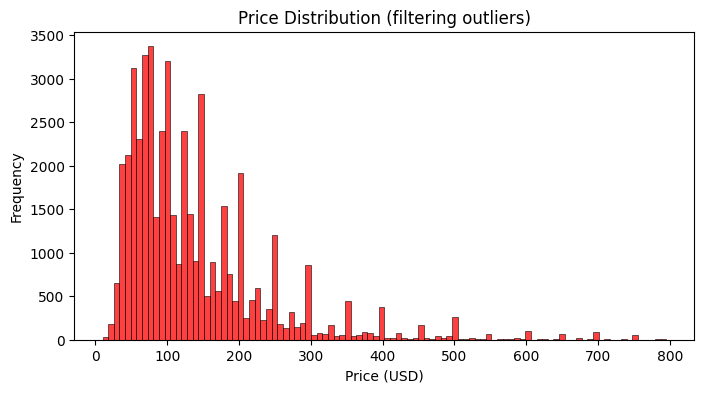

In [27]:
plot_visualization(
    lambda: sns.histplot(
        filtered_df['price'],
        bins=100,
        color='red',
    ),
    'Price Distribution (filtering outliers)',
    'Price (USD)',
    'Frequency',
)

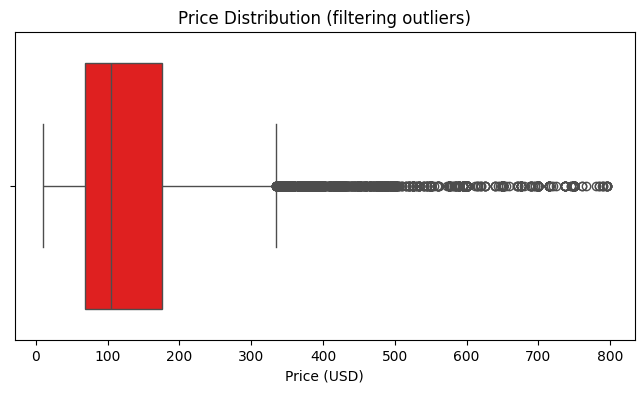

In [29]:
plot_visualization(
    lambda: sns.boxplot(filtered_df['price'], color='red', orient='h'),
    'Price Distribution (filtering outliers)',
    'Price (USD)',
    '',
)

### Price analysis by `bairro_group` and `room_type`


In [29]:
df.groupby(['bairro_group', 'room_type'])['price'].agg(
    [
        'mean',
        'min',
        'max',
    ]
)

mean  min    max
bairro_group  room_type                              
Bronx         Entire home/apt  127.506596   28   1000
              Private room      66.890937   10   2500
              Shared room       59.800000   20    800
Brooklyn      Entire home/apt  178.346202   10  10000
              Private room      76.538272   10   7500
              Shared room       50.773723   15    725
Manhattan     Entire home/apt  249.257994   10  10000
              Private room     116.776622   10   9999
              Shared room       88.977083   10   1000
Queens        Entire home/apt  147.050573   10   2600
              Private room      71.762456   10  10000
              Shared room       69.020202   11   1800
Staten Island Entire home/apt  173.846591   48   5000
              Private room      62.292553   20    300
              Shared room       57.444444   13    150

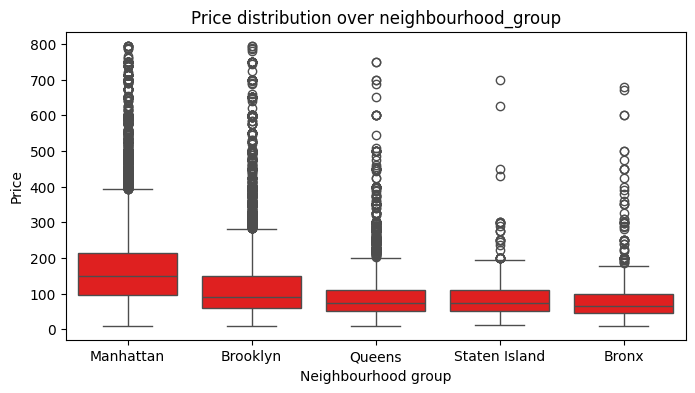

In [30]:
plot_visualization(
    lambda: sns.boxplot(x='bairro_group', y='price', data=filtered_df, color='red'),
    'Price distribution over neighbourhood_group',
    'Neighbourhood group',
    'Price',
)

### Price analysis over `room_type`


In [31]:
df.groupby('room_type')['price'].agg(
    [
        'mean',
        'min',
        'max',
    ]
)

,mean,min,max
room_type,,,
Entire home/apt,211.810918,10,10000
Private room,89.806479,10,10000
Shared room,70.248705,10,1800


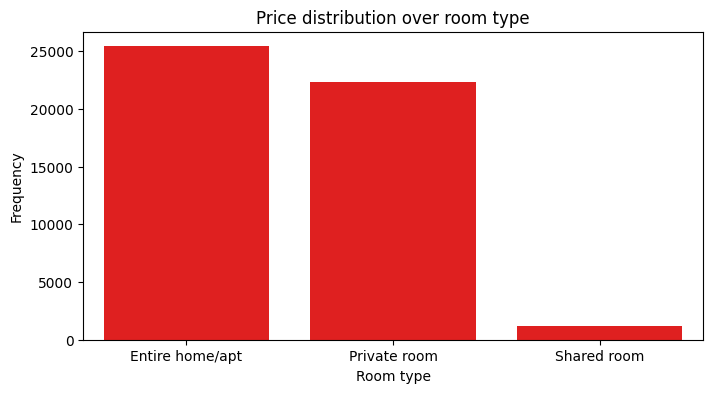

In [31]:
plot_visualization(
    lambda: sns.countplot(x='room_type', data=df, color='red'),
    'Price distribution over room type',
    'Room type',
    'Frequency',
)

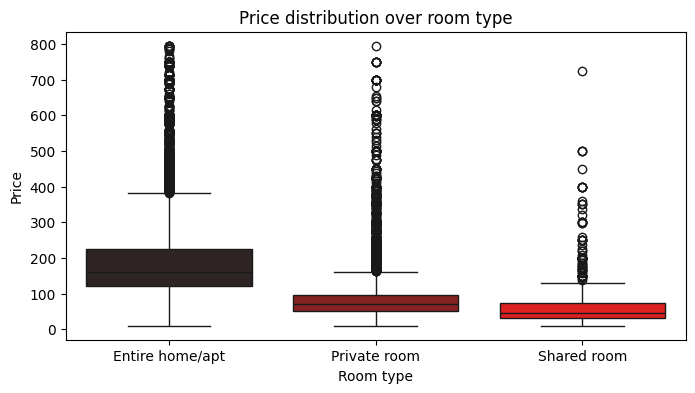

In [32]:
plot_visualization(
    lambda: sns.boxplot(
        x='room_type',
        y='price',
        hue='room_type',
        data=filtered_df,
        palette='dark:red',
    ),
    'Price distribution over room type',
    'Room type',
    'Price',
)

### Price analysis for `bairro_group`


In [34]:
df.groupby('bairro_group')['price'].agg(
    [
        'mean',
        'min',
        'median',
        'max',
    ]
).sort_values('mean', ascending=False)

,mean,min,median,max
bairro_group,,,,
Manhattan,196.884903,10,150.0,10000
Brooklyn,124.437693,10,90.0,10000
Staten Island,114.812332,13,75.0,5000
Queens,99.517649,10,75.0,10000
Bronx,87.577064,10,65.0,2500


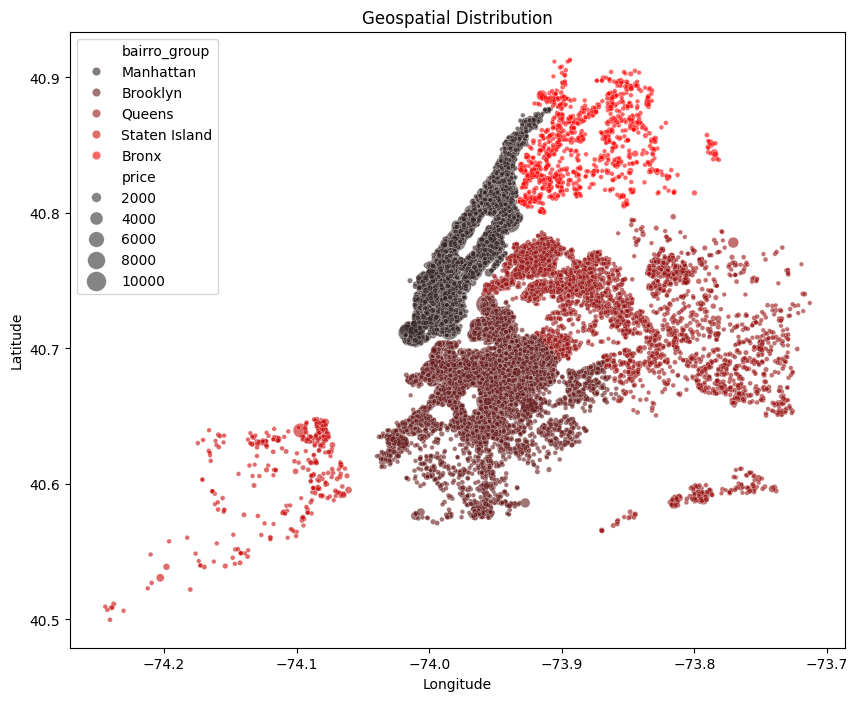

In [33]:
plot_visualization(
    lambda: sns.scatterplot(
        x='longitude',
        y='latitude',
        hue='bairro_group',
        size='price',
        sizes=(10, 200),  # Adjust point sizes
        alpha=0.6,
        palette='dark:red',
        data=df,
    ),
    'Geospatial Distribution',
    'Longitude',
    'Latitude',
    figsize=(10, 8),
)

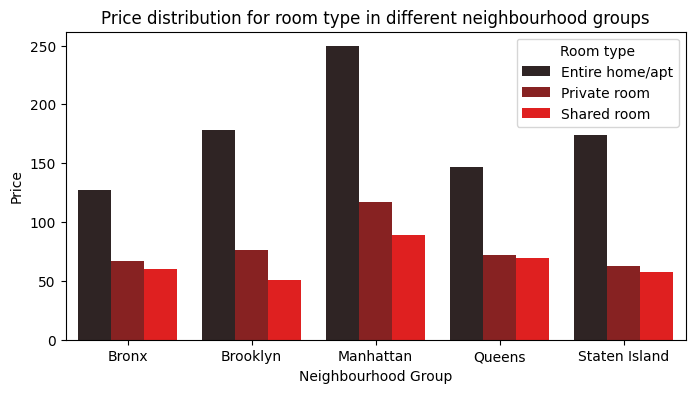

In [36]:
plot_visualization(
    lambda: sns.barplot(
        x='bairro_group',
        y='price',
        hue='room_type',
        data=df.groupby(['bairro_group', 'room_type'])['price'].mean().reset_index(),
        palette='dark:red',
    ),
    'Price distribution for room type in different neighbourhood groups',
    'Neighbourhood Group',
    'Price',
    legend='Room type',
)

### Analysis of `disponibilidade_365`


In [37]:
df['disponibilidade_365'].describe()

count    48883.000000
mean       112.774339
std        131.623674
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

#### Biggest possible earnings


In [38]:
df['potential_earnings'] = df['price'] * df['disponibilidade_365']
potential_earnings = (
    df.groupby('bairro_group').agg(rendimento_medio=('potential_earnings', 'mean'))
).sort_values(by='rendimento_medio', ascending=False)
potential_earnings

,rendimento_medio
bairro_group,
Manhattan,26610.229455
Staten Island,24308.227882
Bronx,15500.551376
Queens,15264.282210
Brooklyn,13922.355629


In [39]:
potential_earnings.values.flatten()

array([26610.22945522, 24308.22788204, 15500.55137615, 15264.28220967,
       13922.35562855])

In [40]:
potential_earnings = pd.DataFrame(
    {
        'bairro': potential_earnings.index.values,
        'rendimento_medio': list(potential_earnings.values.flatten()),
    }
)
potential_earnings

,bairro,rendimento_medio
0,Manhattan,26610.229455
1,Staten Island,24308.227882
2,Bronx,15500.551376
3,Queens,15264.282210
4,Brooklyn,13922.355629


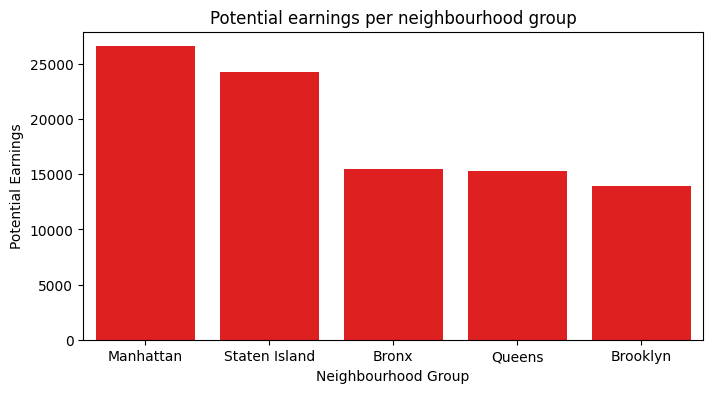

In [41]:
plot_visualization(
    lambda: sns.barplot(
        x='bairro', y='rendimento_medio', data=potential_earnings, color='red'
    ),
    'Potential earnings per neighbourhood group',
    'Neighbourhood Group',
    'Potential Earnings',
)

### Price analysis per `host_id`


In [44]:
host_analysis = (
    df.groupby('host_id')
    .agg(listings_count=('host_id', 'size'), avg_price_per_host=('price', 'mean'))
    .reset_index()
    .sort_values(by='listings_count', ascending=False)
)

In [45]:
host_analysis

,host_id,listings_count,avg_price_per_host
34644,219517861,327,253.195719
29405,107434423,232,303.150862
19572,30283594,121,277.528926
31077,137358866,103,43.825243
12805,12243051,96,213.031250
...,...,...,...
13357,13540183,1,150.000000
13356,13538150,1,97.000000
13355,13535952,1,300.000000
13354,13533446,1,139.000000


In [46]:
top_20_avg_price = host_analysis.head(20)['avg_price_per_host'].mean()
bottom_20_avg_price = host_analysis.tail(20)['avg_price_per_host'].mean()

In [51]:
print(
    f'Mean price for 20 hosts with most property: {top_20_avg_price:.2f}\
    \nMean price for 20 hosts with least property: {bottom_20_avg_price:.2f}'
)

Mean price for 20 hosts with most property: 195.61    
Mean price for 20 hosts with least property: 157.10


### Análise de reviews


In [46]:
correlation = df['numero_de_reviews'].corr(df['price'])
print(f'Correlation between number of reviews and price: {correlation:.2f}')

Correlation between number of reviews and price: -0.05


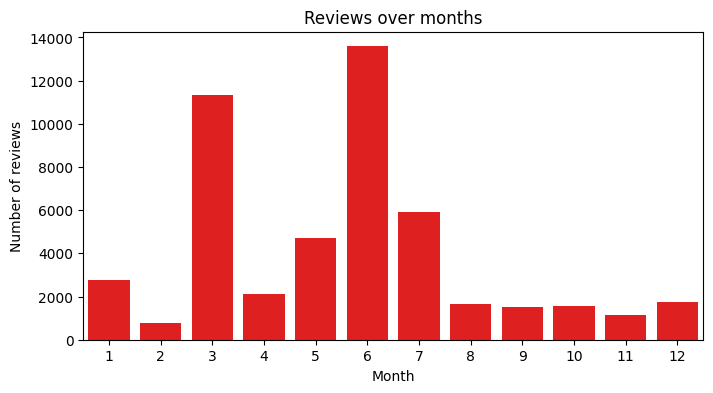

In [52]:
reviews_over_time = df.groupby(df['ultima_review'].dt.month).size()

plot_visualization(
    lambda: sns.barplot(reviews_over_time, color='red'),
    'Reviews over months',
    'Month',
    'Number of reviews',
)

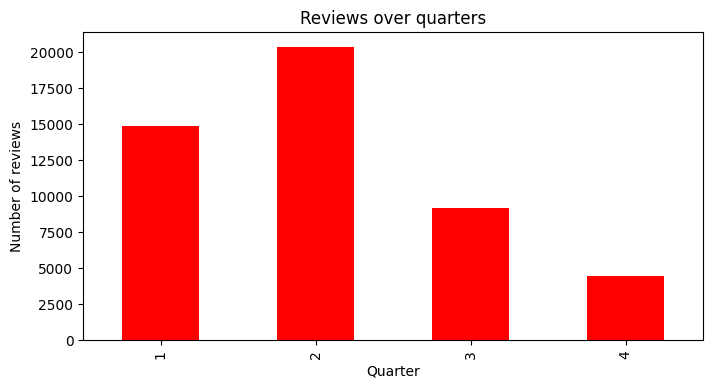

In [53]:
reviews_over_time = df.groupby(df['ultima_review'].dt.quarter).size()

plot_visualization(
    lambda: reviews_over_time.plot(kind='bar', color='red'),
    'Reviews over quarters',
    'Quarter',
    'Number of reviews',
)

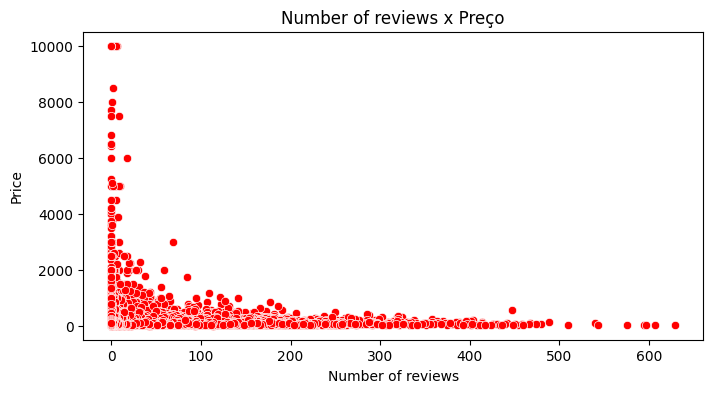

In [54]:
plot_visualization(
    lambda: sns.scatterplot(x='numero_de_reviews', y='price', data=df, color='red'),
    'Number of reviews x Preço',
    'Number of reviews',
    'Price',
)

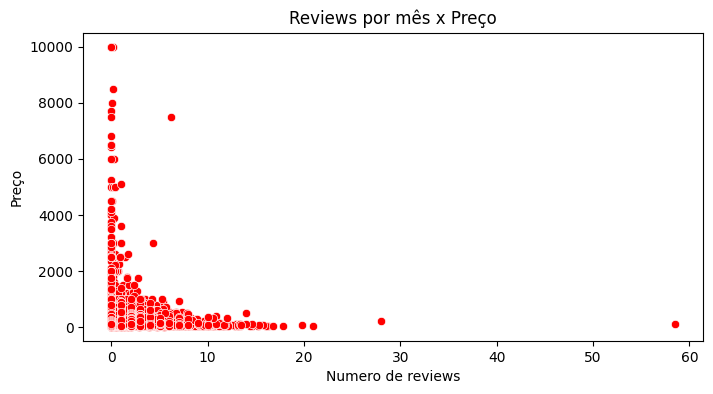

In [55]:
plot_visualization(
    lambda: sns.scatterplot(x='reviews_por_mes', y='price', data=df, color='red'),
    'Reviews per month x Preço',
    'Reviews per month',
    'Price',
)

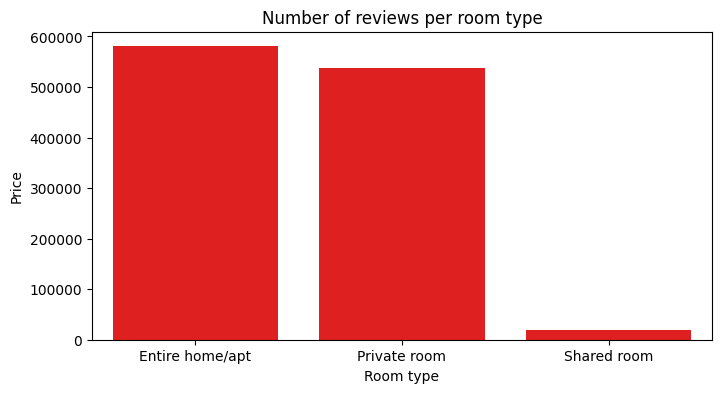

In [56]:
plot_visualization(
    lambda: sns.barplot(
        x='room_type',
        y='numero_de_reviews',
        data=df.groupby('room_type')['numero_de_reviews'].sum().reset_index(),
        color='red',
    ),
    'Number of reviews per room type',
    'Room type',
    'Price',
)

## Pattern on the property's name


In [52]:
names_price = (
    df[['nome', 'price']].sort_values(by='price', ascending=False)[:100].copy()
)
names_dict = {}

for _, nome_price in names_price.iterrows():
    nome = nome_price['nome'].lower()
    price = nome_price['price']

    for word in nome.split():
        if word in names_dict:
            names_dict[word][0] += 1
            names_dict[word][1].append(price)
        else:
            names_dict[word] = [1, [price]]

word_avg_price = {
    word: [count, np.mean(prices)] for word, (count, prices) in names_dict.items()
}
word_df = pd.DataFrame(
    [(word, count, price) for word, (count, price) in word_avg_price.items()],
    columns=['word', 'count', 'price'],
)
word_df.sort_values(by='count', ascending=False, inplace=True)

In [53]:
most_common_words = word_df[:25].copy()
most_common_words.set_index('word', inplace=True)

In [54]:
most_common_words.drop(
    'in by - (hidden airbnb) for 1 with 2'.split(), axis=0, inplace=True
)
most_common_words.shape

(16, 2)

In [55]:
most_common_words[:10]

,count,price
word,,
luxury,12,4604.166667
apartment,10,4389.000000
bedroom,10,3680.000000
townhouse,8,3852.375000
park,8,2992.500000
room,6,4175.000000
loft,6,3041.666667
location,6,4725.000000
west,6,3269.166667


## Correlations


In [56]:
num_df = df[
    [
        'price',
        'minimo_noites',
        'numero_de_reviews',
        'reviews_por_mes',
        'calculado_host_listings_count',
        'disponibilidade_365',
    ]
].corr()['price']
num_df.sort_values()

reviews_por_mes                 -0.050531
numero_de_reviews               -0.047926
minimo_noites                    0.042805
calculado_host_listings_count    0.057462
disponibilidade_365              0.081851
price                            1.000000
Name: price, dtype: float64

In [57]:
df[['price', 'minimo_noites', 'disponibilidade_365']].corr()['price']

price                  1.000000
minimo_noites          0.042805
disponibilidade_365    0.081851
Name: price, dtype: float64